# NITOC REPORT
 - By Charlie Said

## Issue Background
In May 2022, Stoa's Debate Committee announced that the debate qualification standards would be changed.  While 2 green check marks would still be required to qualify for NITOC, the system for gaining green checks changed.

Before:
 - Any team that ends the tournament with a "positive record" would get a green check.  This typically meant a 4-2 in prelims, but if a team broke on a 3-3, won Quarters and Semis, and then lost or won Finals (ending with a record of 5-4 or 6-3 respectively), they would also check.  Going 4-2, breaking, then losing outround 1 for a final record of 4-3 would also give the team a check mark.
After:
 - Teams in the top 38% of the tournament (in the final rankings) would get a green check.

This change was met with overwhelmingly negative response from the Stoa student body.  The main complaint was that the system would allow a scenario where a team going 4-2 in prelims might lose their check depending on how outrounds went.  Secondarily, the system created a flat checking threshold for the entire nation.  (While the 38% number was chosen to reflect the average checks-to-teams ratio across all Stoa tournaments, in practice, smaller tournaments would often have a higher proportion of check marks.  This would allow teams in smaller and less well-networked states a slightly easier path to NITOC).

Stoa's explanation for the change was controversial in the community as well.  Their full statement can be read here: https://web.archive.org/web/20220925215013/https://nitoc2022.homeschooldebate.net/debatechange.  Of note, point 5 (titled "Make Outrounds great again!") read, "Outrounds are very much undervalued in the league today. Debaters are thrilled to break, but only because it means they are probably 4-2. *Students work just hard enough to make sure they break and get a check, but they don’t put much effort into trying to win outrounds.*" [Emphasis added].  Obviously, many competitors felt this analysis to be quite insulting.  The point concluded, "Many students have the attitude that they can “afford to lose two rounds” in prelims. But they would have a different attitude if they had to win an outround to move into a higher tier."

The real reason Stoa made this change was to establish a lever of control over the NITOC debate population.  Under point 2 of their justification for the change, they observed, "if at any point, the speech world needs to cut back on the number of contenders at NITOC, they could announce that for one or more (or all) speech events, students need to be in the top X% at a local tournament instead of the top 40% as it is now. *This could be a great tool both for speech and debate, to be able to limit the events that are overwhelming us* (e.g. Cold Reading, Impromptu, etc.) and at the same time to encourage the events in which we want to encourage more competitors (e.g. Oratory Analysis, Dramatic Interpretation, etc)." [Emphasis added].  Point 6 said it more bluntly; "*growth will be unsustainable if we continue to keep current qualification standards.* At some point we will need to adjust our standards to accommodate the growing number of students. Additionally, *finding NITOC facilities large enough to accommodate all qualified teams may become a problem* as the league grows. Changing the qualification standard can help keep NITOC a reasonable size."

At the time, it was impossible to square the need to have fewer teams at NITOC and the choice of 38% as the check threshold.  The change only made sense if the 38% was a placeholder for future adjustments.

That change came on August 1st, 2025, when Stoa announced in an email to Stoa members, "Checkmarks for debate will also be awarded to competitors who finish the tournament in the top 35% of competitors."  In addition, all speech events had their check threshold raised to the top 35%.  The Impromptu event remained at its high of 25%.  In explanation, Stoa added, "*This change is being made to help us manage the number of qualified competitors*, as our current and anticipated NITOC venues have a firm capacity limit of 600 students. As Stoa continues to grow, reducing the qualifying percentage will help us stay within that limit while preserving the quality of the national tournament experience. *It is important to note that our goal is not to reduce NITOC attendance*, but to maintain it at approximately 600 students—*the same level we have seen over the past several years.*"

## Purpose of Investigation
The claim that this change is necessary to maintain a consistent number of NITOC attendees is dubious at best.  This report aims to assess the data behind this decision and independently assess them.


## Methodology
Drawing on data scraped from NITOC

In [98]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
nitoc_data = pd.read_csv('nitoc_tournaments.csv').drop(columns=['name', 'url'])
# Move the year column to the front
nitoc_data = nitoc_data[['year', 'state'] + [col for col in nitoc_data.columns if col != 'year' and col != 'state']]

# Replace all NaN values with 0 
nitoc_data = nitoc_data.fillna(0)

# Drop debate Speaker events.  These are not separate events but a separate competition that is derived from the debate events.
nitoc_data = nitoc_data.drop(columns=['Lincoln Douglas Value Speaker', 'Team Policy Speaker', 'Parliamentary Speaker'])

# Create a new column for the total number of competitors
nitoc_data['total_competitors'] = nitoc_data.iloc[:, 2:].sum(axis=1)

nitoc_data

,year,state,Apologetics,Cold Reading,Dramatic Interpretation,Duo Interpretation,Expository,Extemporaneous,Humorous Interpretation,Mars Hill,...,Oratory Analysis,Motivational Speaking,Impromptu,Slam Poetry,Storytelling,Original Interpretation,Interp in a Box,Broadcasting,Demonstration Speech,total_competitors
0,2010,CA,61,0.0,28,48,20,45,35,0.0,...,0.0,0.0,115.0,0.0,0.0,0.0,0.0,0.0,0.0,632.0
1,2011,CA,88,0.0,40,64,37,81,57,0.0,...,0.0,0.0,168.0,0.0,0.0,0.0,0.0,0.0,0.0,934.0
2,2012,CO,109,0.0,43,63,48,104,70,0.0,...,0.0,0.0,221.0,0.0,0.0,15.0,0.0,0.0,0.0,1128.0
3,2013,AR,118,0.0,30,65,52,126,54,75.0,...,0.0,0.0,237.0,0.0,68.0,0.0,0.0,0.0,0.0,1339.0
4,2014,CA,122,0.0,28,65,54,118,42,89.0,...,0.0,0.0,0.0,0.0,110.0,0.0,0.0,126.0,0.0,1328.0
5,2015,SC,102,0.0,30,50,43,125,40,77.0,...,0.0,52.0,0.0,0.0,0.0,0.0,0.0,131.0,0.0,1205.0
6,2016,MO,131,0.0,35,48,54,129,40,86.0,...,0.0,51.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1273.0
7,2017,TN,132,225.0,33,50,52,129,35,87.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1450.0
8,2018,CA,161,244.0,31,52,40,125,40,92.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,1452.0
9,2019,TX,162,0.0,29,43,34,140,38,94.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.0,1216.0


In [99]:
nitoc_data.columns

Index(['year', 'state', 'Apologetics', 'Cold Reading',
       'Dramatic Interpretation', 'Duo Interpretation', 'Expository',
       'Extemporaneous', 'Humorous Interpretation', 'Mars Hill', 'Monologue',
       'Open Interpretation', 'Original Oratory', 'Persuasive',
       'Lincoln Douglas Value Debate', 'Parliamentary Debate',
       'Team Policy Debate', 'Oratory Analysis', 'Motivational Speaking',
       'Impromptu', 'Slam Poetry', 'Storytelling', 'Original Interpretation',
       'Interp in a Box', 'Broadcasting', 'Demonstration Speech',
       'total_competitors'],
      dtype='object')

## Total NITOC Trends
Here, we examine the situation that created the need for this policy change in the first place; the rise in overall NITOC attendance and the pressure that high attendance puts on the location.

While in their August 1st email, the Stoa Board stated that 600 competitors was their ideal cap, total competitors is not the relevant metric.  One student may compete in one event, or 6.  The relevant metric would be total event population (that is, the number of participants in each event).  NITOC typically breaks this number down across 4 time blocks: Speech Pattern A, Speech Pattern B, TP/LD, and Parli.  About half the speeches are in Pattern A, and the rest in Pattern B.  In theory, this allocation of events over time blocks distributes the competitor load over the facility's limited number of rooms.

The below plot shows how total NITOC event population has changed since the first NITOC in 2010.

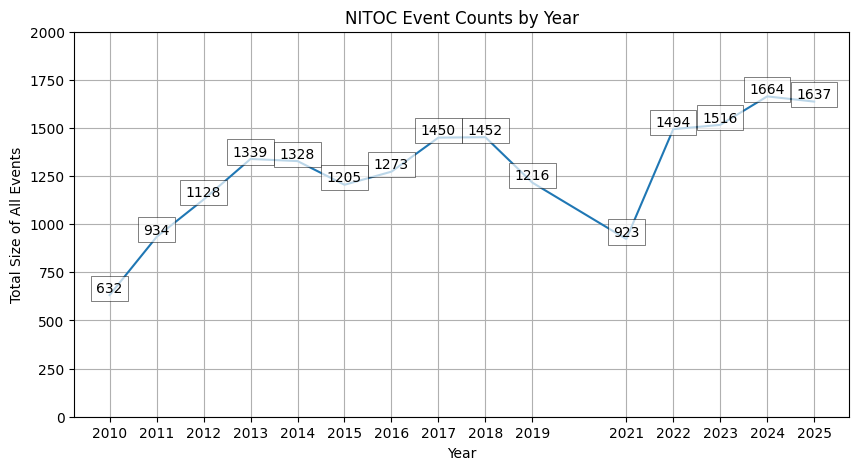

In [100]:
sns.lineplot(x='year', y='total_competitors', data=nitoc_data)
plt.title("NITOC Event Counts by Year")
plt.xlabel("Year")
plt.ylabel("Total Size of All Events")
plt.grid(True)

# Adjust the dimensions of the plot
plt.gcf().set_size_inches(10, 5)

# Hardcode the y axis to be 0-1000
plt.ylim(0, 2000)

# Show each year on the x axis
plt.xticks(nitoc_data['year'])

# Put labels on each point.
for index, row in nitoc_data.iterrows():
    plt.text(row['year'], row['total_competitors'], int(row['total_competitors']), ha='center', va='bottom', 
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='black', linewidth=0.5))


plt.show()

The plot shows a fairly straightfoward story; In the first 5 years, NITOC size grew, reached a plateau until about 2018, and then fell drastically during the COVID-19 pandemic.  Since its dip, though, it has recovered strong and has jumped back to new heights.

However, there is a lot more to this simple story.

## Speech Event Trends
Each Speech event is different.  There are 4 categories of speech events: 
 - Interpretations (where competitors act out a humorous or dramatic story)
 - Platform (where competitors speak directly to inform the audience, sometimes using props)
 - Limited Preparation (where competitors must craft their speech in a short span of time)
 - Wild Card

The Wild Card event changes each year, and is voted on by the families in Stoa from a number of options offered by the Speech Committee.  They vary between limited-prep interpretations, more complex platforms, and everything in between.  Some Wild Card events have been fairly normal and saw average to low participation (such as Oratory Analysis), while others, often by merit of their low barrier to entry (such as Cold Reading, an event so easy literally anyone could do it) saw amazingly high participation.

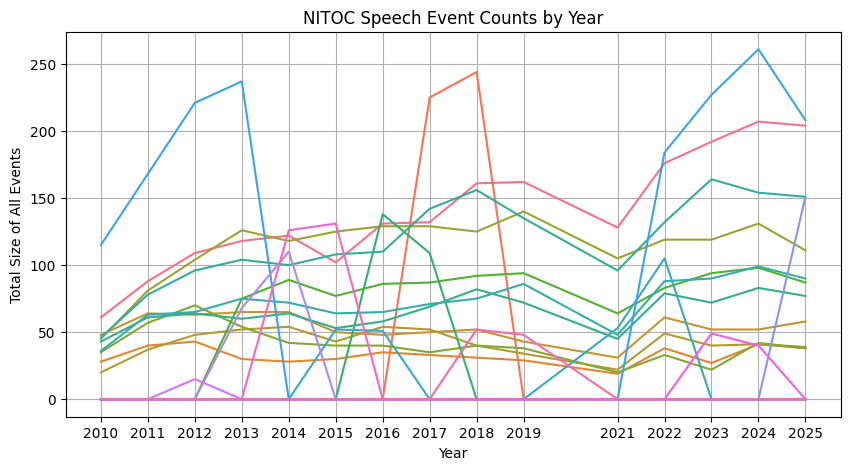

In [101]:
speech_melt = nitoc_data
speech_melt = speech_melt.drop(columns=['Lincoln Douglas Value Debate', 'Team Policy Debate', 'Parliamentary Debate', 'total_competitors', 'state'])

speech_melt = speech_melt.melt(id_vars=['year'], var_name='event', value_name='count')

sns.lineplot(x = 'year', y = 'count', data=speech_melt, hue='event', legend=False)

plt.title("NITOC Speech Event Counts by Year")
plt.xlabel("Year")
plt.ylabel("Total Size of All Events")
plt.grid(True)

# Adjust the dimensions of the plot
plt.gcf().set_size_inches(10, 5)

# Show each year on the x axis
plt.xticks(nitoc_data['year'])

plt.show()

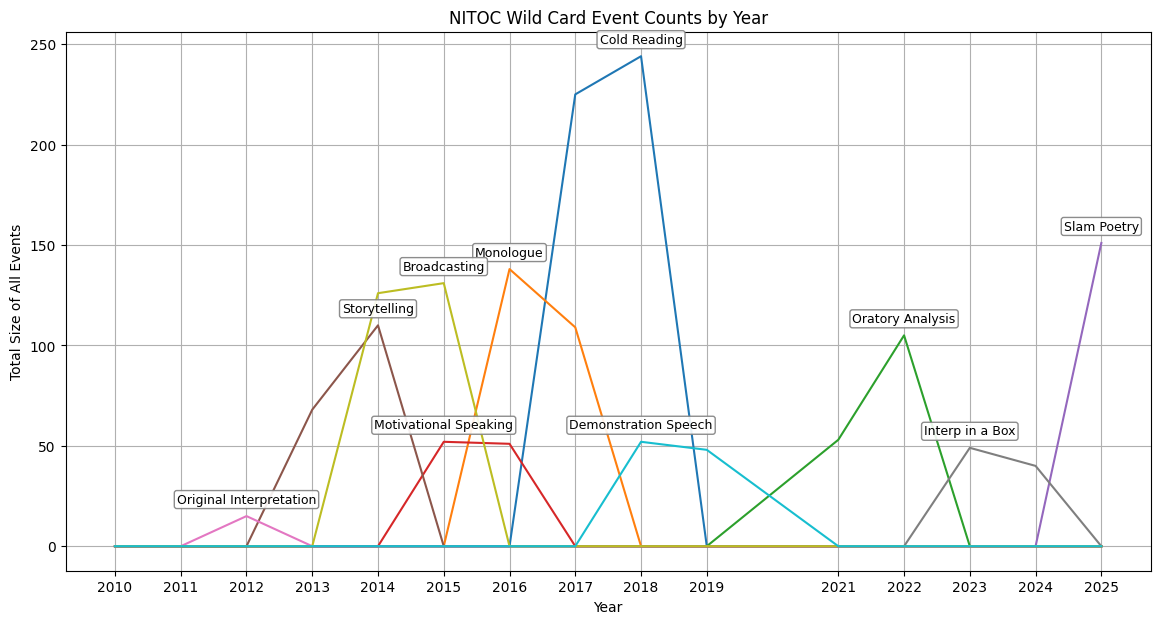

In [111]:
speech_melt2 = nitoc_data
speech_melt2 = speech_melt2.drop(columns=['Lincoln Douglas Value Debate', 
                                          'Team Policy Debate', 
                                          'Parliamentary Debate', 
                                          'total_competitors', 
                                          'state',
                                          'Apologetics', 
                                          'Dramatic Interpretation', 
                                          'Duo Interpretation', 
                                          'Expository',
                                          'Extemporaneous', 
                                          'Humorous Interpretation', 
                                          'Open Interpretation', 
                                          'Original Oratory', 
                                          'Persuasive',
                                          'Mars Hill',
                                          'Impromptu'])


speech_melt2 = speech_melt2.melt(id_vars=['year'], var_name='event', value_name='count')

plt.figure(figsize=(14, 7))
sns.lineplot(x = 'year', y = 'count', data=speech_melt2, hue='event', legend=False)

plt.title("NITOC Wild Card Event Counts by Year")
plt.xlabel("Year")
plt.ylabel("Total Size of All Events")
plt.grid(True)

# Show each year on the x axis
plt.xticks(nitoc_data['year'])

# Add labels at the maximum point for each event (avoids overlapping at endpoints)
for event in speech_melt2['event'].unique():
    event_data = speech_melt2[speech_melt2['event'] == event]
    # Find the point with maximum count for this event
    max_row = event_data[event_data['count'] == event_data['count'].max()]
    if not max_row.empty:
        x_pos = max_row['year'].iloc[0]
        y_pos = max_row['count'].iloc[0]
        clean_name = event.replace(' flag', '').replace('flag', '')
        plt.text(x_pos, y_pos + 5, clean_name, 
                fontsize=9, va='bottom', ha='center',
                bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.9, edgecolor='gray'))

plt.show()

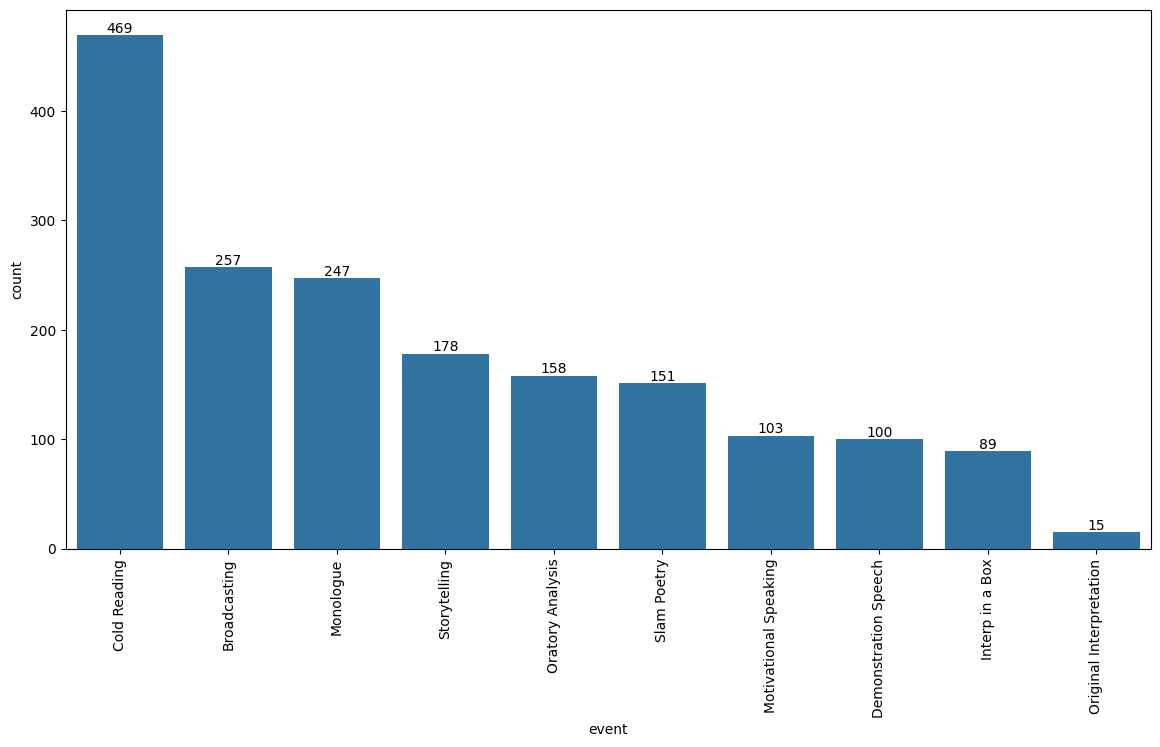

In [119]:
# Gather counts on each event across year
wildcard_volume = nitoc_data.drop(columns=['Lincoln Douglas Value Debate', 
                                          'Team Policy Debate', 
                                          'Parliamentary Debate', 
                                          'total_competitors', 
                                          'state',
                                          'Apologetics', 
                                          'Dramatic Interpretation', 
                                          'Duo Interpretation', 
                                          'Expository',
                                          'Extemporaneous', 
                                          'Humorous Interpretation', 
                                          'Open Interpretation', 
                                          'Original Oratory', 
                                          'Persuasive',
                                          'Mars Hill',
                                          'Impromptu',
                                          'year'])

wildcard_volume = pd.DataFrame({'event':wildcard_volume.columns, 'count':wildcard_volume.sum(axis=0)}).sort_values(by='count', ascending=False)

plt.figure(figsize=(14, 7))
sns.barplot(x = 'event', y = 'count', data=wildcard_volume)

# Orient bar labels vertically
plt.xticks(rotation=90)

# Add labels to each bar
for index, row in wildcard_volume.iterrows():
    plt.text(index, row['count'], int(row['count']), ha='center', va='bottom')

plt.show()

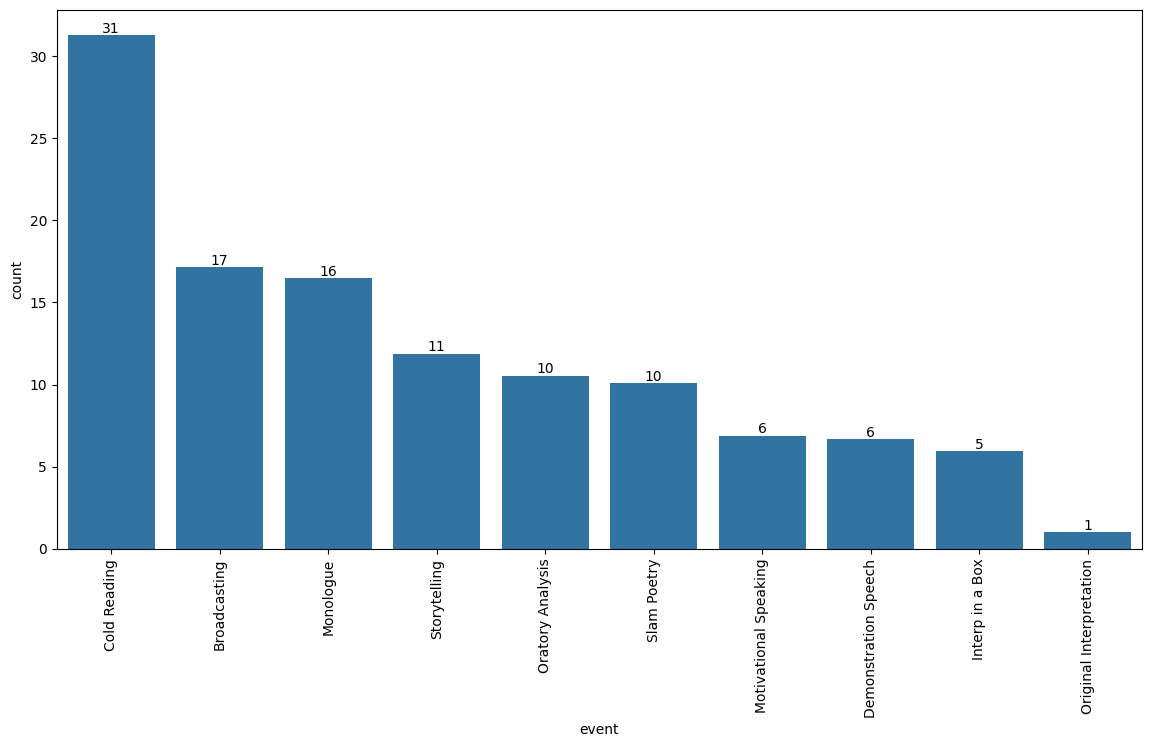

In [120]:
# Gather counts on each event across year
wildcard_volume = nitoc_data.drop(columns=['Lincoln Douglas Value Debate', 
                                          'Team Policy Debate', 
                                          'Parliamentary Debate', 
                                          'total_competitors', 
                                          'state',
                                          'Apologetics', 
                                          'Dramatic Interpretation', 
                                          'Duo Interpretation', 
                                          'Expository',
                                          'Extemporaneous', 
                                          'Humorous Interpretation', 
                                          'Open Interpretation', 
                                          'Original Oratory', 
                                          'Persuasive',
                                          'Mars Hill',
                                          'Impromptu',
                                          'year'])

wildcard_volume = pd.DataFrame({'event':wildcard_volume.columns, 'count':wildcard_volume.mean(axis=0)}).sort_values(by='count', ascending=False)

plt.figure(figsize=(14, 7))
sns.barplot(x = 'event', y = 'count', data=wildcard_volume)

# Orient bar labels vertically
plt.xticks(rotation=90)

# Add labels to each bar
for index, row in wildcard_volume.iterrows():
    plt.text(index, row['count'], int(row['count']), ha='center', va='bottom')

plt.show()